# Laboratory exercise 1
https://github.com/koroteevmv/ML_course/blob/main/ML0.2%20simple%20analisys/README.md

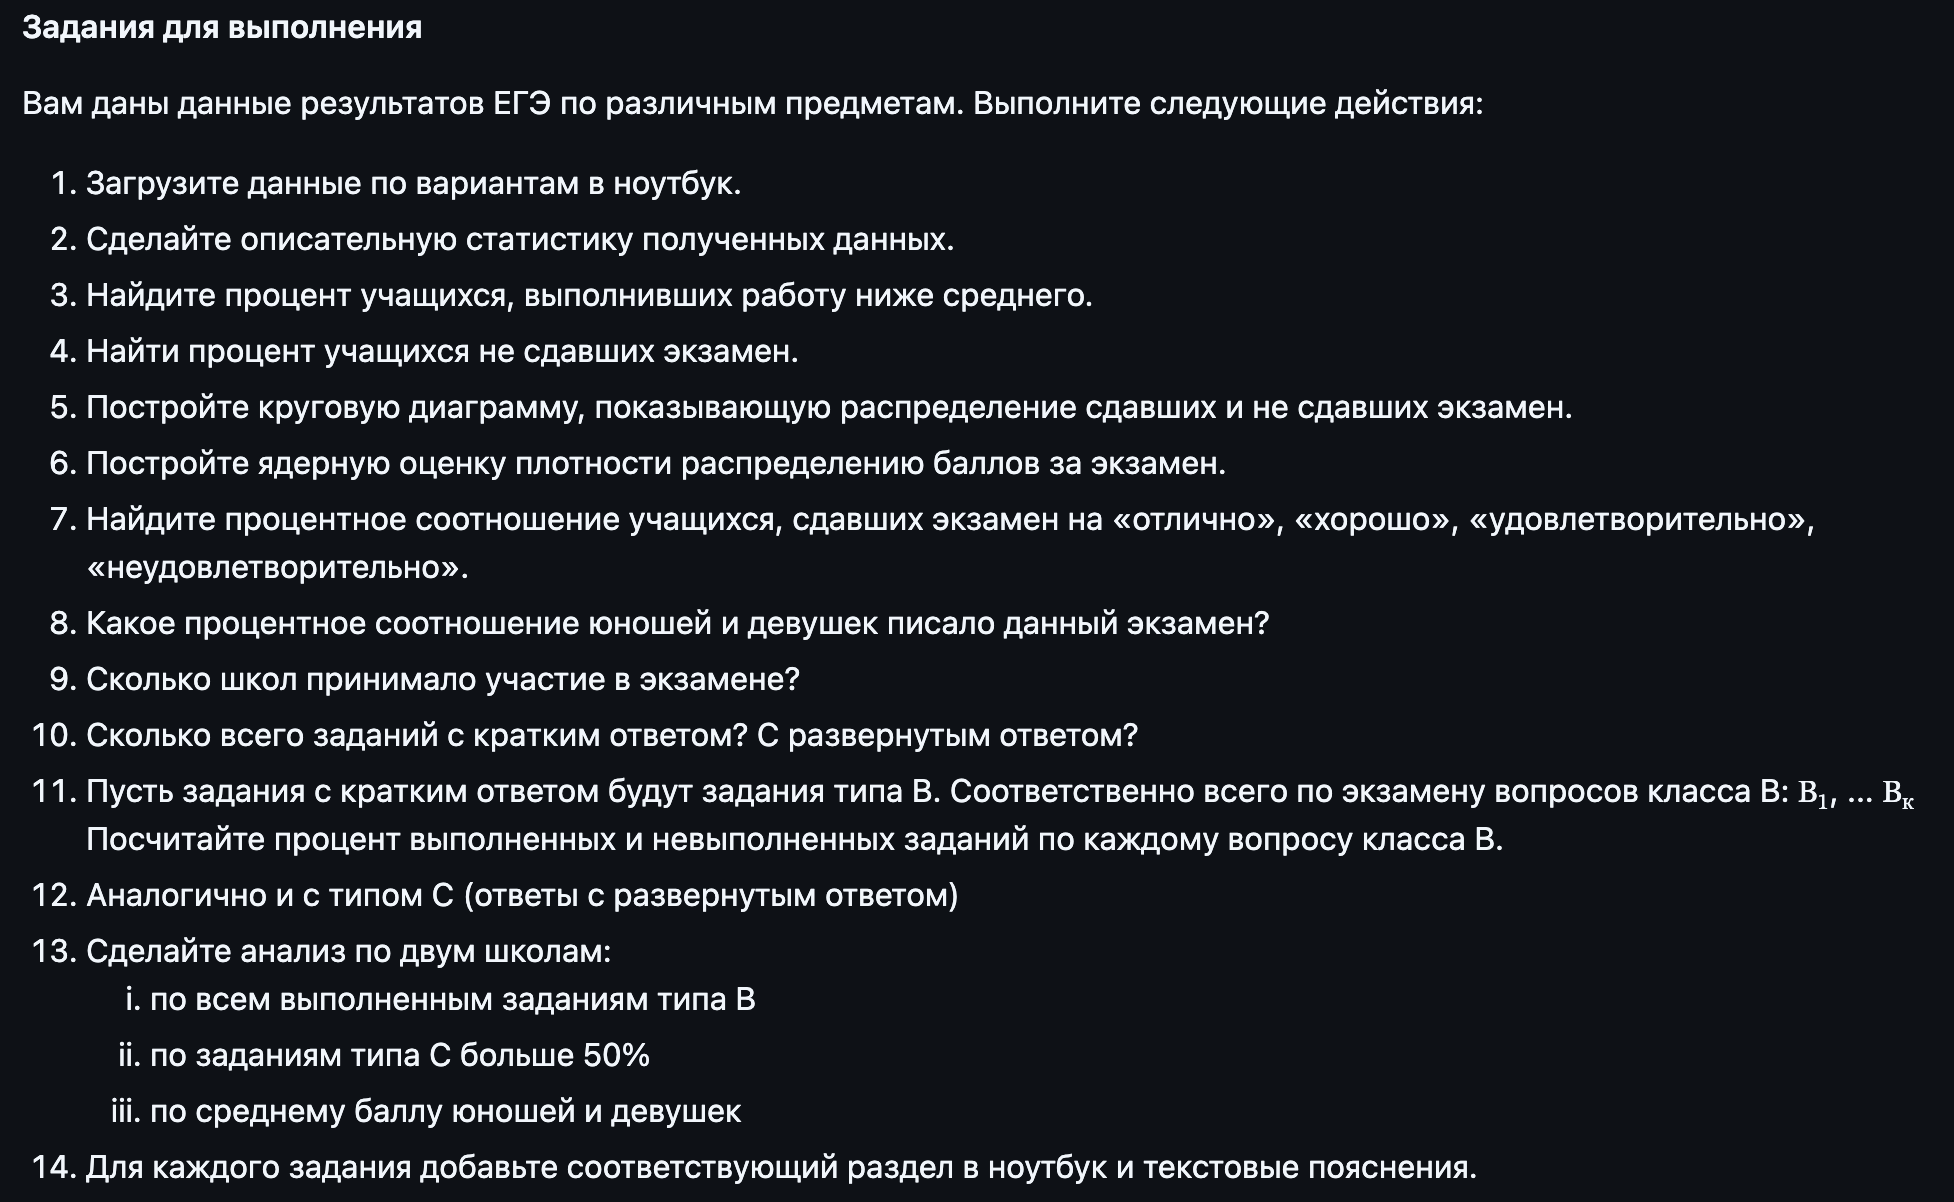

In [22]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


url = "https://github.com/koroteevmv/ML_course/raw/refs/heads/main/ML0.2%20simple%20analisys/data/%D0%92%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82%202.xlsx"


df = pd.read_excel(url, engine='openpyxl', header=2) 
df.head(5)

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,124.0,11,Ж,341.0,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
1,2.0,128.0,11,Ж,345.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
2,3.0,132.0,11,Ж,340.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
3,4.0,134.0,11,Ж,339.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
4,5.0,136.0,11,Ж,348.0,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0


In [23]:
#2
print("\nОписательная статистика числовых столбцов:")
print(df.describe())

print("\nОписательная статистика категориальных столбцов:")
print(df.describe(include=['object']))



Описательная статистика числовых столбцов:
                 №      № школы  Номер варианта  Первичный балл         Балл  \
count  2356.000000  2356.000000     2356.000000     2356.000000  2357.000000   
mean   1178.500000   132.005518      338.273769       10.123939    49.255093   
std     680.262939     5.037984       53.660878        3.820484    17.876625   
min       1.000000   121.000000      101.000000        1.000000     5.000000   
25%     589.750000   127.000000      339.000000        7.000000    33.000000   
50%    1178.500000   135.000000      342.500000       10.000000    50.000000   
75%    1767.250000   136.000000      346.000000       13.000000    68.000000   
max    2356.000000   137.000000      506.000000       27.000000    96.000000   

       Минимальный балл  
count            2356.0  
mean               27.0  
std                 0.0  
min                27.0  
25%                27.0  
50%                27.0  
75%                27.0  
max                27.0  



In [24]:
#3
# Рассчитаем средний балл
mean_score = df['Балл'].mean()
print(f"\nСредний балл по экзамену: {mean_score:.2f}")

# Найдем количество учащихся, чей балл ниже среднего
students_below_mean = df[df['Балл'] < mean_score]
count_below_mean = len(students_below_mean)
total_students = len(df)

# Рассчитаем процент
percent_below_mean = (count_below_mean / total_students) * 100
print(f"Процент учащихся, выполнивших работу ниже среднего балла: {percent_below_mean:.2f}%")


Средний балл по экзамену: 49.26
Процент учащихся, выполнивших работу ниже среднего балла: 47.98%


In [25]:
#4
# Убедимся, что 'Минимальный балл' является числовым типом
df['Минимальный балл'] = pd.to_numeric(df['Минимальный балл'], errors='coerce')

# Обработка NaN в 'Балл'
df['Балл'] = pd.to_numeric(df['Балл'], errors='coerce')
df_cleaned = df.dropna(subset=['Балл', 'Минимальный балл'])

# Найдем количество учащихся, чей балл ниже минимального
failed_students = df_cleaned[df_cleaned['Балл'] < df_cleaned['Минимальный балл']]
count_failed = len(failed_students)
total_students_for_pass_check = len(df_cleaned)

# Рассчитаем процент
percent_failed = (count_failed / total_students_for_pass_check) * 100
print(f"\nПроцент учащихся, не сдавших экзамен: {percent_failed:.2f}%")


Процент учащихся, не сдавших экзамен: 9.21%


/var/folders/cf/dsjp45hx7pv84khcfymq7qq00000gq/T/ipykernel_74498/3356095354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Сдал'] = df_cleaned['Балл'] >= df_cleaned['Минимальный балл']


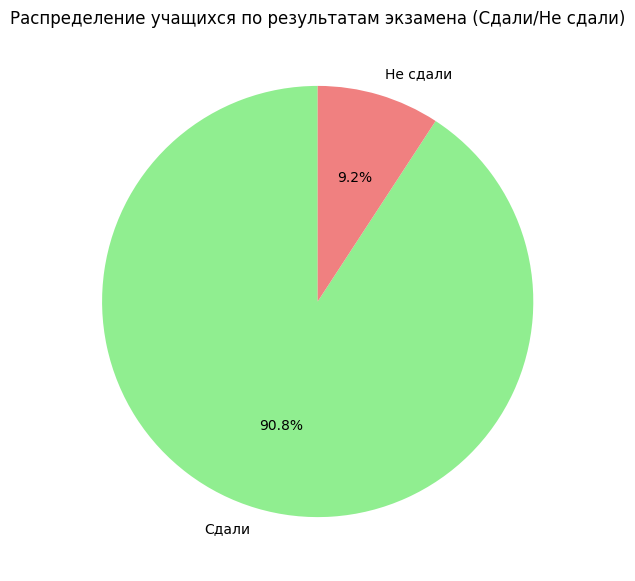

In [26]:
#5
# Создадим столбец 'Сдал/Не сдал'
df_cleaned['Сдал'] = df_cleaned['Балл'] >= df_cleaned['Минимальный балл']
pass_fail_counts = df_cleaned['Сдал'].value_counts()

pass_fail_counts.index = ['Сдали' if x else 'Не сдали' for x in pass_fail_counts.index]

plt.figure(figsize=(7, 7))
plt.pie(pass_fail_counts, labels=pass_fail_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Распределение учащихся по результатам экзамена (Сдали/Не сдали)')
plt.show()

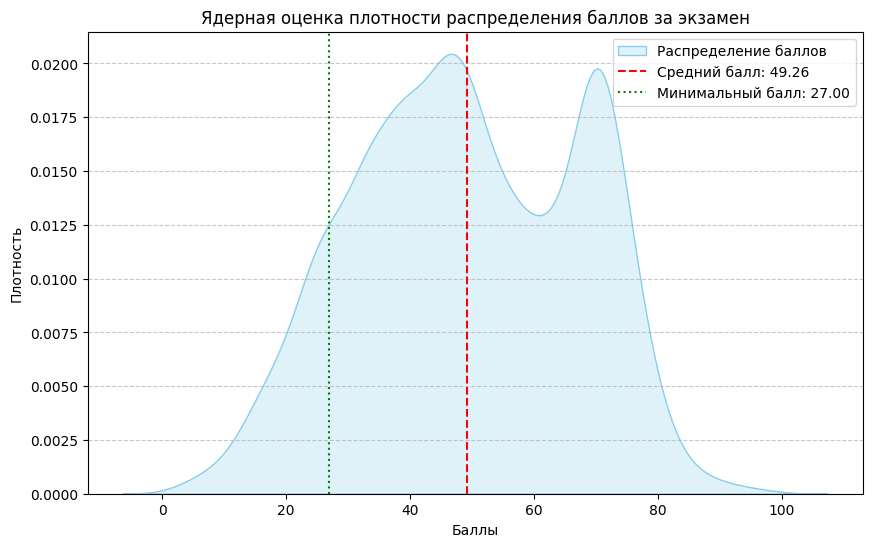

In [28]:
#6
plt.figure(figsize=(10, 6))
sns.kdeplot(df_cleaned['Балл'], fill=True, color='skyblue', label='Распределение баллов')
plt.axvline(mean_score, color='red', linestyle='--', label=f'Средний балл: {mean_score:.2f}')
plt.axvline(df_cleaned['Минимальный балл'].iloc[0], color='green', linestyle=':', label=f'Минимальный балл: {df_cleaned["Минимальный балл"].iloc[0]:.2f}')
plt.title('Ядерная оценка плотности распределения баллов за экзамен')
plt.xlabel('Баллы')
plt.ylabel('Плотность')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Процентное соотношение учащихся по оценкам:
Оценка
Удовлетворительно      57.852292
Хорошо                 30.899830
Неудовлетворительно     9.210526
Отлично                 2.037351
Name: proportion, dtype: float64


/var/folders/cf/dsjp45hx7pv84khcfymq7qq00000gq/T/ipykernel_74498/436027651.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Оценка'] = df_cleaned.apply(


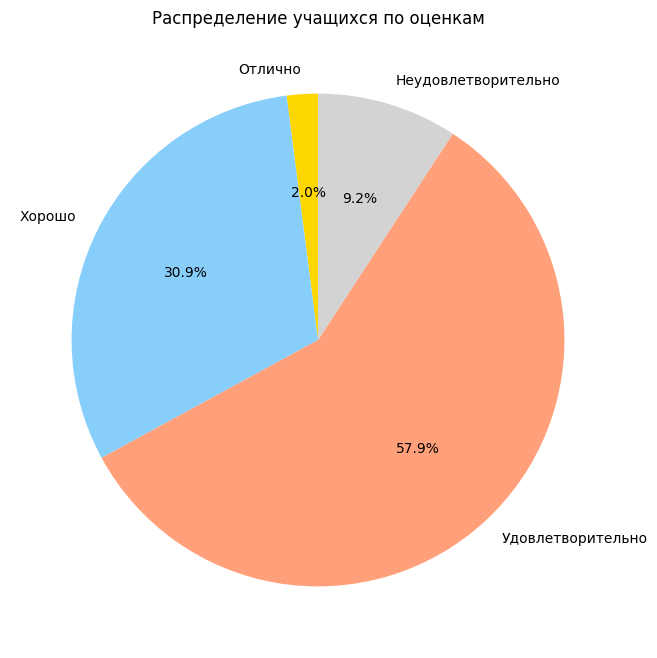

In [29]:
#7
max_possible_score = 100 

def assign_grade(score, min_pass_score, max_score):
    if score < min_pass_score:
        return 'Неудовлетворительно'
    elif score >= 0.8 * max_score: 
        return 'Отлично'
    elif score >= 0.6 * max_score: 
        return 'Хорошо'
    else: 
        return 'Удовлетворительно'

# Применяем функцию к каждому баллу
df_cleaned['Оценка'] = df_cleaned.apply(
    lambda row: assign_grade(row['Балл'], row['Минимальный балл'], max_possible_score),
    axis=1
)

grade_counts = df_cleaned['Оценка'].value_counts(normalize=True) * 100
print(f"\nПроцентное соотношение учащихся по оценкам:")
print(grade_counts)

# Построим круговую диаграмму для оценок
plt.figure(figsize=(8, 8))
# Определим порядок для наглядности
order = ['Отлично', 'Хорошо', 'Удовлетворительно', 'Неудовлетворительно']
grade_counts_ordered = grade_counts.reindex(order, fill_value=0) 

plt.pie(grade_counts_ordered, labels=grade_counts_ordered.index, autopct='%1.1f%%', startangle=90,
        colors=['gold', 'lightskyblue', 'lightsalmon', 'lightgrey'])
plt.title('Распределение учащихся по оценкам')
plt.show()


Процентное соотношение юношей и девушек, писавших экзамен:
Пол
Ж    52.843803
М    47.156197
Name: proportion, dtype: float64


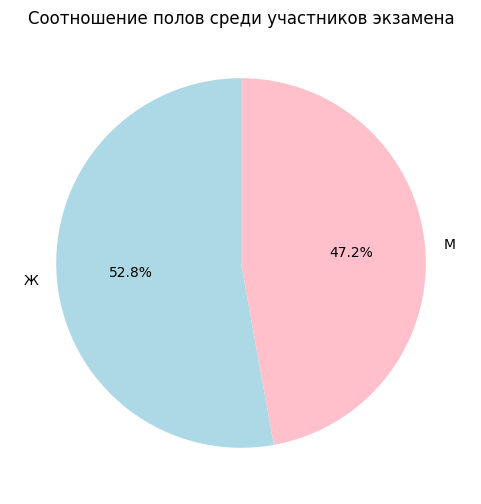

In [30]:
#8
gender_counts = df['Пол'].value_counts(normalize=True) * 100
print(f"\nПроцентное соотношение юношей и девушек, писавших экзамен:")
print(gender_counts)

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Соотношение полов среди участников экзамена')
plt.show()

In [31]:
#9
# Убедимся, что '№ школы' является числовым типом
df['№ школы'] = pd.to_numeric(df['№ школы'], errors='coerce')
num_unique_schools = df['№ школы'].nunique()
print(f"\nКоличество школ, принимавших участие в экзамене: {num_unique_schools}")


Количество школ, принимавших участие в экзамене: 17


In [32]:
#10
# Задания с кратким ответом
short_answers_sample = df['Задания с кратким ответом'].dropna().iloc[0] if not df['Задания с кратким ответом'].dropna().empty else None
num_short_answer_questions = 0
if short_answers_sample:
    num_short_answer_questions = len(short_answers_sample)
print(f"\nКоличество заданий с кратким ответом (на основе примера): {num_short_answer_questions}")

# Задания с развёрнутым ответом
# Используем регулярные выражения для подсчета паттернов типа "число(число)"
import re

long_answers_sample = df['Задания с развёрнутым ответом'].dropna().iloc[0] if not df['Задания с развёрнутым ответом'].dropna().empty else None
num_long_answer_questions = 0
if long_answers_sample:
    # Ищем все вхождения паттерна "число(число)"
    matches = re.findall(r'\d+\(\d+\)', str(long_answers_sample))
    num_long_answer_questions = len(matches)
print(f"Количество заданий с развёрнутым ответом (на основе примера): {num_long_answer_questions}")


Количество заданий с кратким ответом (на основе примера): 12
Количество заданий с развёрнутым ответом (на основе примера): 7



Процент выполненных/невыполненных заданий типа В:
  Задание B1: Выполнено: 89.22%, Не выполнено: 10.73%
  Задание B2: Выполнено: 95.33%, Не выполнено: 4.67%
  Задание B3: Выполнено: 92.78%, Не выполнено: 7.22%
  Задание B4: Выполнено: 91.00%, Не выполнено: 9.00%
  Задание B5: Выполнено: 88.50%, Не выполнено: 11.50%
  Задание B6: Выполнено: 73.17%, Не выполнено: 26.83%
  Задание B7: Выполнено: 37.48%, Не выполнено: 62.52%
  Задание B8: Выполнено: 47.84%, Не выполнено: 52.16%
  Задание B9: Выполнено: 91.85%, Не выполнено: 8.15%
  Задание B10: Выполнено: 71.48%, Не выполнено: 28.52%
  Задание B11: Выполнено: 59.25%, Не выполнено: 40.75%
  Задание B12: Выполнено: 46.22%, Не выполнено: 53.78%


/var/folders/cf/dsjp45hx7pv84khcfymq7qq00000gq/T/ipykernel_74498/1974239980.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(short_answers_df.applymap(lambda x: 1 if x == '+' else 0).head(20), cmap='viridis', cbar=False)


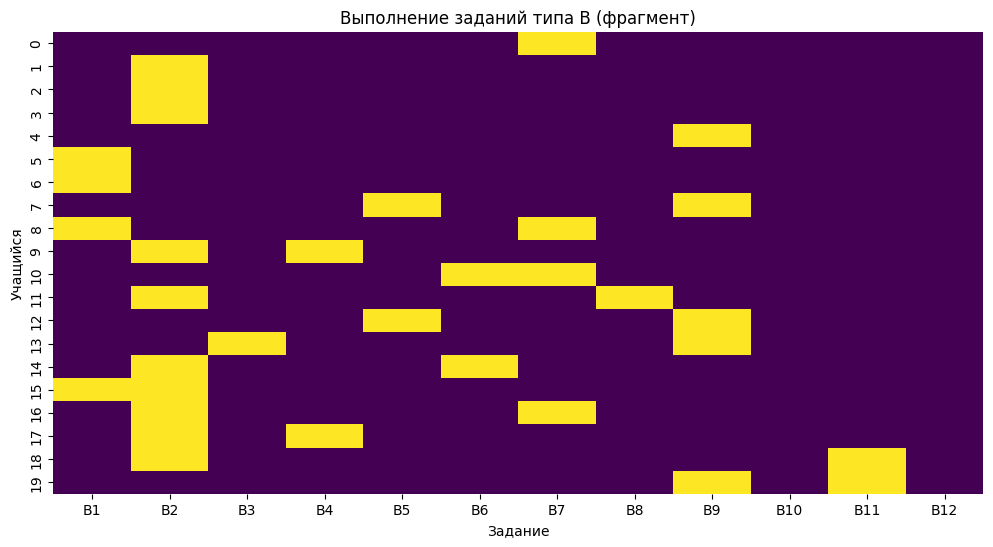

In [33]:
#11
# Создаем DataFrame для анализа заданий типа В
short_answers_df = df['Задания с кратким ответом'].apply(lambda x: list(str(x)) if pd.notna(x) else [''])
short_answers_df = pd.DataFrame(short_answers_df.tolist())

# Переименуем столбцы для ясности (В1, В2, ...)
short_answers_df.columns = [f'B{i+1}' for i in range(short_answers_df.shape[1])]

# Подсчитываем выполненные ('+') и невыполненные ('-') для каждого задания
print("\nПроцент выполненных/невыполненных заданий типа В:")
for col in short_answers_df.columns:
    counts = short_answers_df[col].value_counts(normalize=True) * 100
    performed_percent = counts.get('+', 0)
    not_performed_percent = counts.get('-', 0)
    print(f"  Задание {col}: Выполнено: {performed_percent:.2f}%, Не выполнено: {not_performed_percent:.2f}%")

# Визуализация для первых нескольких вопросов типа В
if num_short_answer_questions > 0:
    plt.figure(figsize=(12, 6))
    sns.heatmap(short_answers_df.applymap(lambda x: 1 if x == '+' else 0).head(20), cmap='viridis', cbar=False)
    plt.title('Выполнение заданий типа В (фрагмент)')
    plt.xlabel('Задание')
    plt.ylabel('Учащийся')
    plt.show()


Процент выполненных/невыполненных заданий типа С:
  Задание C1: Выполнено: 33.91%, Не выполнено: 66.09%
  Задание C2: Выполнено: 15.87%, Не выполнено: 84.13%
  Задание C3: Выполнено: 15.58%, Не выполнено: 84.42%
  Задание C4: Выполнено: 2.72%, Не выполнено: 97.28%
  Задание C5: Выполнено: 3.40%, Не выполнено: 96.60%
  Задание C6: Выполнено: 1.10%, Не выполнено: 98.90%
  Задание C7: Выполнено: 3.40%, Не выполнено: 96.60%

Проверка бинарных данных для Heatmap (фрагмент):
       C1   C2   C3   C4   C5   C6   C7
1650  1.0  0.0  0.0  0.0  0.0  0.0  0.0
1073  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1604  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2122  1.0  1.0  0.0  0.0  0.0  0.0  0.0
179   0.0  0.0  0.0  0.0  0.0  0.0  0.0


/var/folders/cf/dsjp45hx7pv84khcfymq7qq00000gq/T/ipykernel_74498/269133610.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  long_answers_df_binary = long_answers_df.applymap(lambda x: 1 if x > 0 else (0 if x == 0 else np.nan))


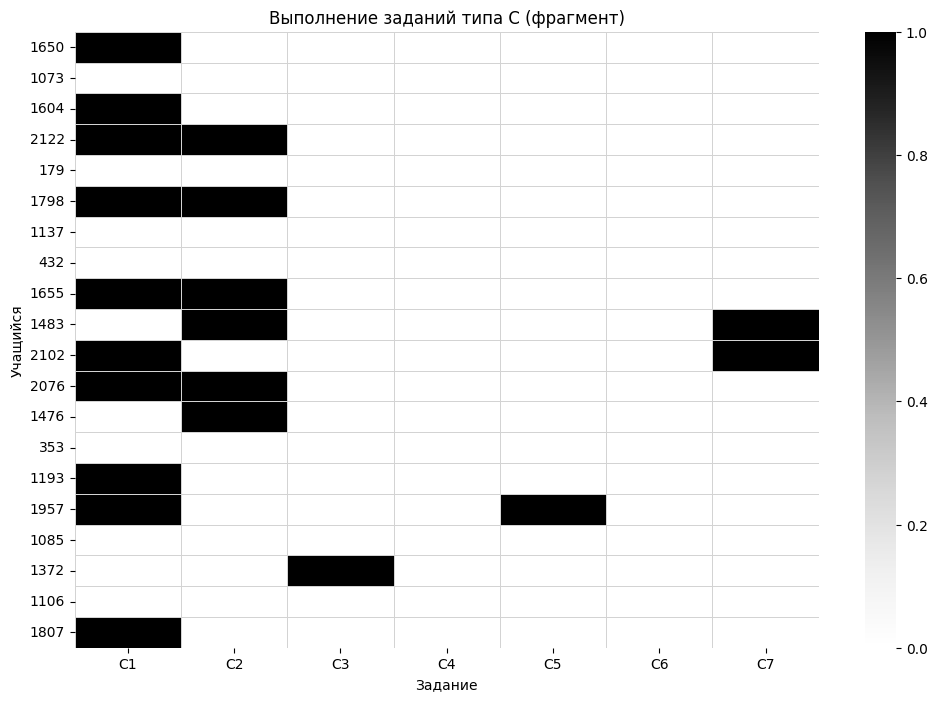

In [ ]:

def parse_long_answers(answer_string):
    if pd.isna(answer_string):
        return []
    matches = re.findall(r'(\d+)\(\d+\)', str(answer_string))
    return [int(m) for m in matches]

long_answers_scores = df['Задания с развёрнутым ответом'].apply(parse_long_answers)

max_len = long_answers_scores.apply(len).max()
if max_len == 0:
    print("\nНет данных для заданий типа С (развернутых ответов). Пропустим визуализацию.")
else:
    long_answers_df = pd.DataFrame(long_answers_scores.tolist(), columns=[f'C{i+1}' for i in range(max_len)])
    long_answers_df = long_answers_df.fillna(-1) # Используем -1 для отсутствующих заданий

    print("\nПроцент выполненных/невыполненных заданий типа С:")
    for col in long_answers_df.columns:
        performed_count = (long_answers_df[col] > 0).sum()
        total_count = (long_answers_df[col] != -1).sum()
        
        if total_count > 0:
            performed_percent = (performed_count / total_count) * 100
            not_performed_percent = 100 - performed_percent
            print(f"  Задание {col}: Выполнено: {performed_percent:.2f}%, Не выполнено: {not_performed_percent:.2f}%")
        else:
            print(f"  Задание {col}: Нет данных об ответах.")


    long_answers_df_binary = long_answers_df.applymap(lambda x: 1 if x > 0 else (0 if x == 0 else np.nan))

    num_rows_to_display = min(20, len(long_answers_df_binary))
    
    if len(long_answers_df_binary) > num_rows_to_display:
        display_df = long_answers_df_binary.sample(n=num_rows_to_display, random_state=42) # random_state для воспроизводимости
    else:
        display_df = long_answers_df_binary
        
    print("\nПроверка бинарных данных для Heatmap (фрагмент):")
    print(display_df.head()) # Посмотрим на данные, которые будут отображаться

    plt.figure(figsize=(12, min(8, num_rows_to_display * 0.4))) # Динамический размер по высоте
    

    sns.heatmap(display_df, cmap='Greys', cbar=True, linewidths=.5, linecolor='lightgrey', annot=False) # Убрал annot=True чтобы не загромождать
    
    plt.title('Выполнение заданий типа С (фрагмент)')
    plt.xlabel('Задание')
    plt.ylabel('Учащийся')
    plt.show()

In [35]:
#13

if df['№ школы'].nunique() >= 2:
    school_ids = df['№ школы'].dropna().unique()
    school1_id = school_ids[0]
    school2_id = school_ids[1]
else:
    print("\nНедостаточно уникальных школ в данных для анализа двух школ.")
    school1_id = df['№ школы'].dropna().iloc[0] # Берем любую доступную
    school2_id = df['№ школы'].dropna().iloc[0] # Если только одна школа, сравниваем ее саму с собой

print(f"\nАнализ по школам {int(school1_id)} и {int(school2_id)}:")

# Разделим данные по школам
df_school1 = df[df['№ школы'] == school1_id].copy()
df_school2 = df[df['№ школы'] == school2_id].copy()

# i. по всем выполненным заданиям типа В
print("\nАнализ по заданиям типа В:")
for school_df, school_name in [(df_school1, f"Школа {int(school1_id)}"), (df_school2, f"Школа {int(school2_id)}")]:
    school_short_answers_df = school_df['Задания с кратким ответом'].apply(lambda x: list(str(x)) if pd.notna(x) else [''])
    if not school_short_answers_df.empty:
        school_short_answers_df = pd.DataFrame(school_short_answers_df.tolist())
        school_short_answers_df.columns = [f'B{i+1}' for i in range(school_short_answers_df.shape[1])]
        
        total_performed = 0
        total_possible = 0
        
        for col in school_short_answers_df.columns:
            performed_count = (school_short_answers_df[col] == '+').sum()
            total_count = len(school_short_answers_df[col])
            total_performed += performed_count
            total_possible += total_count
        
        if total_possible > 0:
            overall_performed_percent = (total_performed / total_possible) * 100
            print(f"{school_name}: Общий процент выполненных заданий типа В: {overall_performed_percent:.2f}%")
        else:
            print(f"{school_name}: Нет данных по заданиям типа В.")
    else:
        print(f"{school_name}: Нет данных по заданиям типа В.")


# ii. по заданиям типа С с больше 50%
print("\nАнализ по заданиям типа С с более 50% выполненных:")
for school_df, school_name in [(df_school1, f"Школа {int(school1_id)}"), (df_school2, f"Школа {int(school2_id)}")]:
    school_long_answers_scores = school_df['Задания с развёрнутым ответом'].apply(parse_long_answers)
    
    # Максимальная длина среди ответов этой школы
    max_len_school = school_long_answers_scores.apply(len).max()

    if max_len_school > 0:
        school_long_answers_df = pd.DataFrame(school_long_answers_scores.tolist(), columns=[f'C{i+1}' for i in range(max_len_school)])
        school_long_answers_df = school_long_answers_df.fillna(-1)

        count_above_50_percent_C = 0
        total_C_questions = 0

        for col in school_long_answers_df.columns:
            performed_count = (school_long_answers_df[col] > 0).sum()
            total_count = (school_long_answers_df[col] != -1).sum() # Учитываем только тех, кто отвечал

            if total_count > 0:
                total_C_questions += 1
                performed_percent = (performed_count / total_count) * 100
                if performed_percent > 50:
                    count_above_50_percent_C += 1
        
        print(f"  {school_name}: Количество заданий типа C, выполненных более чем на 50%: {count_above_50_percent_C} из {total_C_questions}")
    else:
        print(f"  {school_name}: Нет данных по заданиям типа С.")

# iii. по среднему баллу юношей и девушек
print("\nАнализ по среднему баллу юношей и девушек:")
for school_df, school_name in [(df_school1, f"Школа {int(school1_id)}"), (df_school2, f"Школа {int(school2_id)}")]:
    gender_mean_scores = school_df.groupby('Пол')['Балл'].mean()
    print(f"  {school_name}:")
    if 'М' in gender_mean_scores:
        print(f"    Средний балл юношей: {gender_mean_scores['М']:.2f}")
    else:
        print("    Нет данных по юношам.")
    if 'Ж' in gender_mean_scores:
        print(f"    Средний балл девушек: {gender_mean_scores['Ж']:.2f}")
    else:
        print("    Нет данных по девушкам.")


Анализ по школам 124 и 128:

Анализ по заданиям типа В:
Школа 124: Общий процент выполненных заданий типа В: 60.00%
Школа 128: Общий процент выполненных заданий типа В: 69.69%

Анализ по заданиям типа С с более 50% выполненных:
  Школа 124: Количество заданий типа C, выполненных более чем на 50%: 0 из 7
  Школа 128: Количество заданий типа C, выполненных более чем на 50%: 0 из 7

Анализ по среднему баллу юношей и девушек:
  Школа 124:
    Средний балл юношей: 41.08
    Средний балл девушек: 34.17
  Школа 128:
    Средний балл юношей: 42.89
    Средний балл девушек: 44.93
